# Model training

In [1]:
# Imports 
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn import svm

Before training, we will first analyze the dataset. This is a 3D HSV-color space in which every point represents a color band of a resistor in the image dataset. 

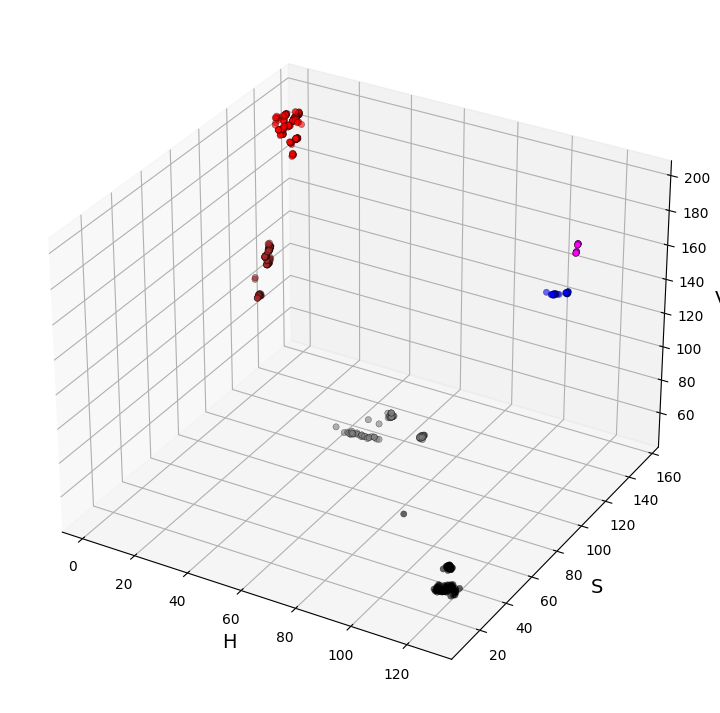

In [2]:
# Load data
df = pd.read_csv("../data/color_data.csv")
c=df['Class'].map({'x':'gray','r':'red','z':'brown','k':'black','b':'blue','v':'magenta','g':'green'})

# Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.H, df.S, df.V, c=c, alpha=.6, edgecolor='k', lw=0.3)
ax.set_xlabel('H', fontsize=14)
ax.set_ylabel('S', fontsize=14)
ax.set_zlabel('V', fontsize=14)
plt.show()

Next, we load the data which contains three feature columns (H, S, and V) and one class column. The labels are encoded before passing to the classifier. 

In [3]:
# Load data
df = pd.read_csv("../data/color_data.csv")

# Encode categorical labels
labelencoder= LabelEncoder() 
df['Class'] = labelencoder.fit_transform(df['Class'])

# Fill missing values
df.fillna(0, inplace=True)

In [4]:
# Train
clf = svm.SVC()
clf.fit(df[['H', 'S', 'V']].values, df['Class'].values)

SVC()

Lastly, the model will be saved for further use. 

In [5]:
# Save model
filename = '../data/model.sav'
pickle.dump(clf, open(filename, 'wb'))